### **Context and Background**  

Diabetes is a **growing health concern** worldwide, affecting millions of people and placing a significant burden on healthcare systems. **Early detection is crucial**, as unmanaged diabetes can lead to severe complications such as **heart disease, kidney failure, nerve damage, and vision loss**.  

**Stark Health Clinic, a technology-driven healthcare provider**, currently lacks a **highly accurate system** for detecting diabetes risk in its patients. The existing screening methods are **not precise enough**, leading to:  
🔹 **Late diagnosis**, where patients receive care only after complications arise.  
🔹 **Increased healthcare costs**, as late-stage diabetes requires **more intensive and expensive treatments**. 

🔹 **Inefficient use of resources**, since the clinic cannot effectively identify and focus on high-risk individuals.  

### **Problem Statement**  

Stark Health Clinic needs a **reliable, data-driven solution** to accurately predict **who is at risk of developing diabetes**. The goal is to **develop a machine learning model** that can analyze patient data and **identify high-risk individuals before symptoms appear**. This model would allow healthcare professionals to take proactive steps.  

### **Why This Problem is Important**  

🔹 **Improved Patient Outcomes** – Early detection enables **lifestyle changes and timely medical intervention**, reducing         complications. 

🔹 **Reduced Healthcare Costs** – Preventive care is **far more cost-effective** than late-stage diabetes management.  
🔹 **Optimized Resource Allocation** – The clinic can **prioritize care** for high-risk patients, improving efficiency.  
🔹 **Data-Driven Decision Making** – Machine learning allows for **more precise, evidence-based medical recommendations**.  

### **Impact of Solving the Problem**  

By implementing an advanced diabetes prediction model, Stark Health Clinic will:  
🔹 **Detect diabetes risk earlier**, allowing for preventive interventions.  
🔹 **Improve patient health**, reducing the need for emergency care and hospitalizations.  
🔹 **Lower long-term costs**, benefiting both patients and the healthcare system.  
🔹 **Enhance its reputation as a leader in AI-powered healthcare**.  

This initiative will **transform how Stark Health Clinic approaches diabetes prevention**, ensuring **better health outcomes and a more efficient healthcare system**.

In [1]:

# for data analysis 
import pandas as pd 
import numpy as np

#for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from collections import Counter



#scikit-learn s
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm  import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# loading the dataset 
df=pd.read_csv("C:\\Users\\vicky\\Downloads\\diabetes_prediction_dataset - diabetes_prediction_dataset.csv")


In [3]:
df.head(2)#  for viewing the top two rows

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [4]:
df.tail(2)#  for viewing the bottom  ten rows

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.sample(5)# checking out random five rows

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
67677,Male,43.0,0,0,No Info,27.77,5.7,145,0
37896,Male,14.0,0,0,never,25.76,4.8,130,0
66909,Male,60.0,0,0,never,27.32,4.5,90,0
86287,Female,12.0,0,0,No Info,21.90,5.0,85,0
65959,Male,38.0,0,0,former,38.00,5.0,100,0


In [6]:
# Dimensionality to explore no of rows and colum
df.shape

(100000, 9)

In [7]:
print("Number of columns",df.shape[0])
print("Number of rows",df.shape[1])

Number of columns 100000
Number of rows 9


In [8]:
#  checking the 9 features of the data
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
#investigating the data set for abnomalies 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
# numerical statiscal Analysis
df.describe ()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


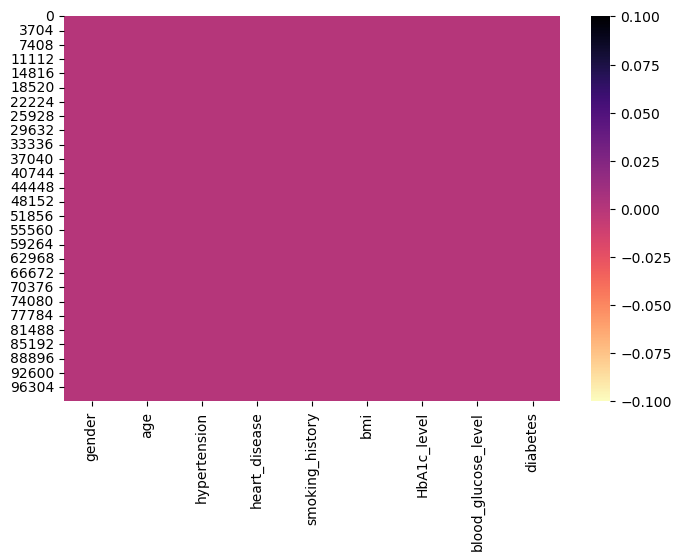

In [11]:
#checking for the missing values
print(df.isnull().sum())
 #visualisizing  the missing values 
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cbar=True ,cmap="magma_r");


#### The uniform color suggests that all data points across all columns (e.g., gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes) are fully available.

## Outlier Analysis

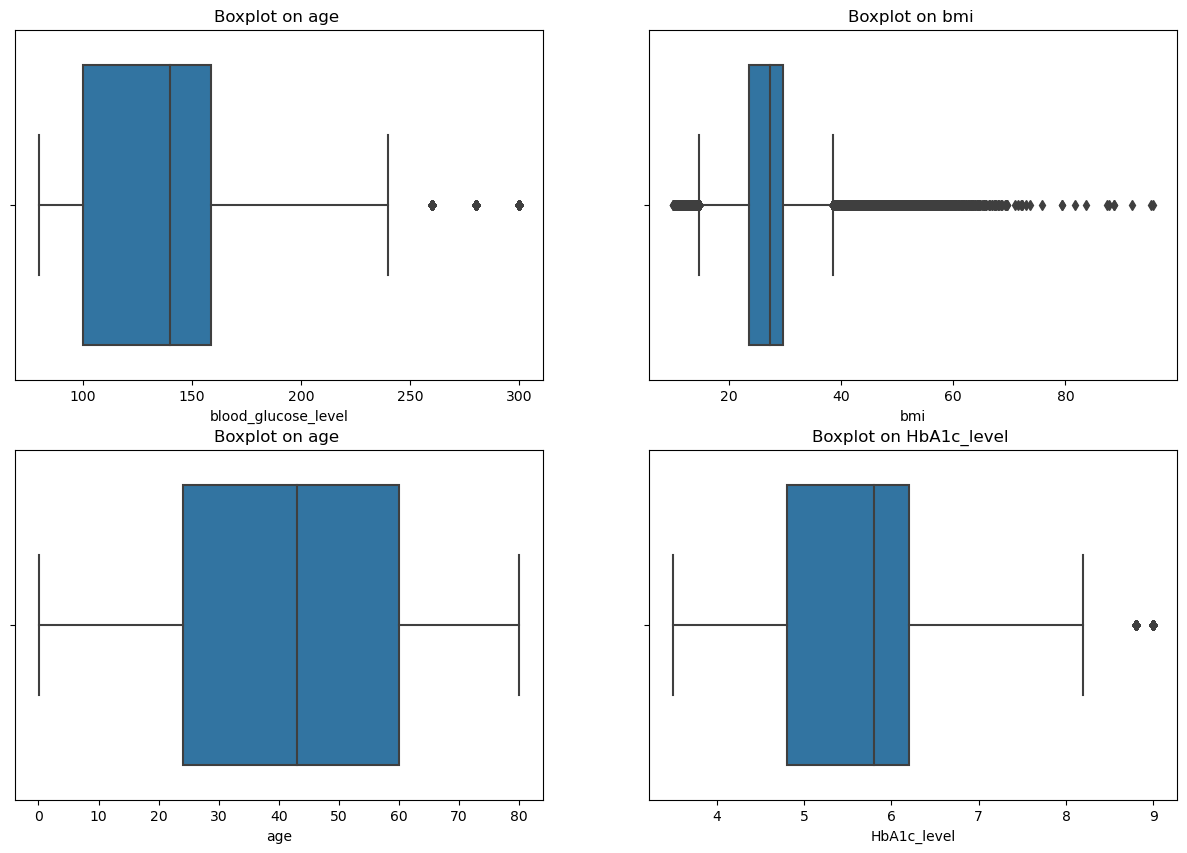

In [12]:
# checking for outliers 
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(x="blood_glucose_level", data=df, ax=axs[0,0])
axs[0,0].set_title ("Boxplot on age ")

sns.boxplot(x="bmi", data=df, ax=axs[0,1])
axs[0,1].set_title ("Boxplot on bmi ")

sns.boxplot(x="age", data=df, ax=axs[1,0])
axs[1,0].set_title ("Boxplot on age ")

sns.boxplot(x="HbA1c_level", data=df, ax=axs[1,1])
axs[1,1].set_title ("Boxplot on HbA1c_level ");

 #### BMI and Blood Glucose Level have significant outliers, indicating potential high-risk patients. Age and HbA1c Level are more normally distributed with fewer extremes. Further analysis is needed to assess the impact of BMI and blood glucose outliers on diabetes prediction.



## Univariate Analysis 

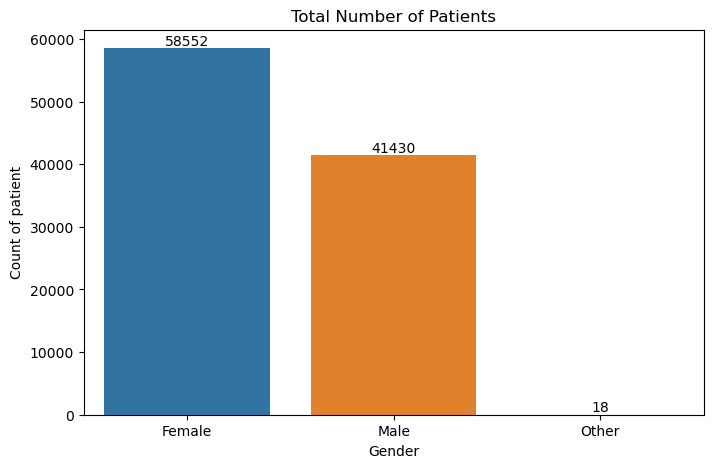

In [13]:
# number of female: male in the gender column
plt.figure(figsize=(8,5))
ax= sns.countplot(x=df["gender"],order= df["gender"].value_counts(ascending=False).index)
values=df["gender"].value_counts(ascending=False).values
plt.xlabel("Gender")
plt.ylabel("Count of patient")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

#### It has been observed that the majority of patients are female compared to male and we have an insignificant numbers that are others.

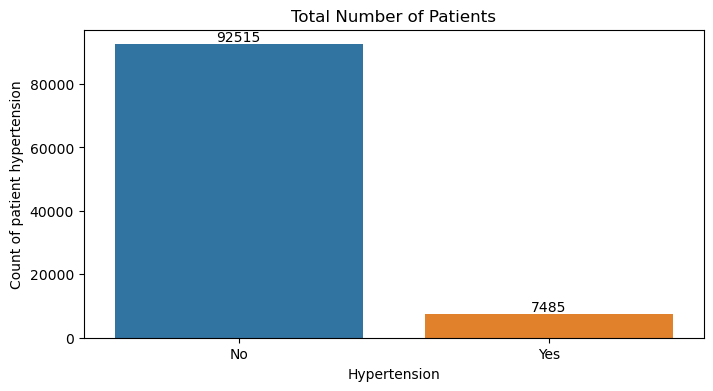

In [14]:
# number of patients with hypertension  
def hypertensionlabel2(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df["hypertensionlabel2"] = df["hypertension"].apply(hypertensionlabel2)


plt.figure(figsize=(8,4))
ax= sns.countplot(x=df['hypertensionlabel2'],order= df['hypertensionlabel2'].value_counts(ascending=False).index)
values=df['hypertensionlabel2'].value_counts(ascending=False).values
plt.xlabel('Hypertension')
plt.ylabel("Count of patient hypertension")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

####  The majority of patients have not had hypertension.

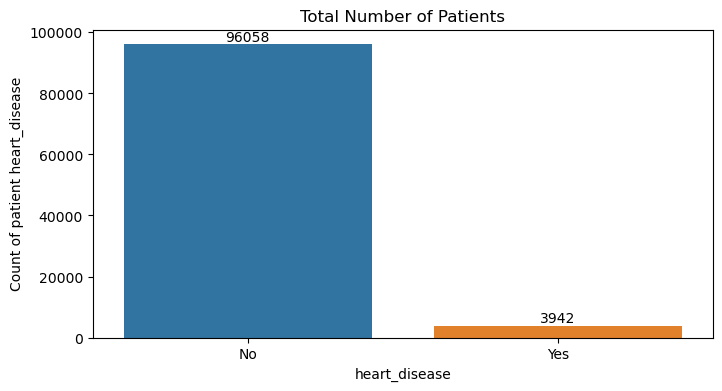

In [15]:
# number of patients with heart disease  


def heartdislabel3(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df["heartdislabel3"] = df['heart_disease'].apply(heartdislabel3)

plt.figure(figsize=(8,4))
ax= sns.countplot(x=df["heartdislabel3"],order= df["heartdislabel3"].value_counts(ascending=False).index)
values=df["heartdislabel3"].value_counts(ascending=False).values
plt.xlabel('heart_disease')
plt.ylabel("Count of patient heart_disease")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

####  The majority of patients have not had heart disease.

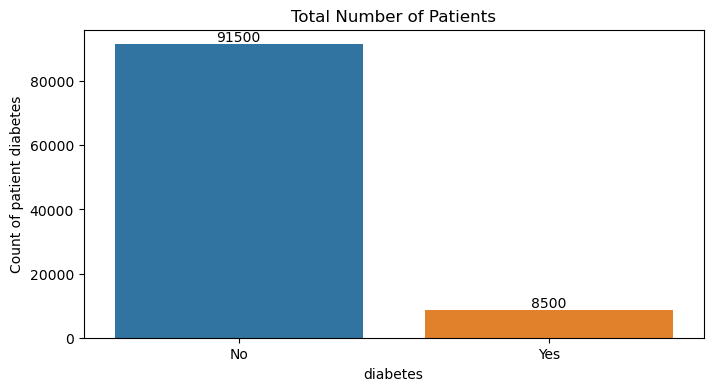

In [16]:
# number of patients with diabetes

def diabeteslabel4(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df["diabeteslabel4"] = df['diabetes'].apply(diabeteslabel4)
plt.figure(figsize=(8,4))
ax= sns.countplot(x=df['diabeteslabel4'],order= df['diabeteslabel4'].value_counts(ascending=False).index)
values=df['diabeteslabel4'].value_counts(ascending=False).values
plt.xlabel('diabetes')
plt.ylabel("Count of patient diabetes")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

####  The majority of patients have not had diabetes which is the main target of our study.

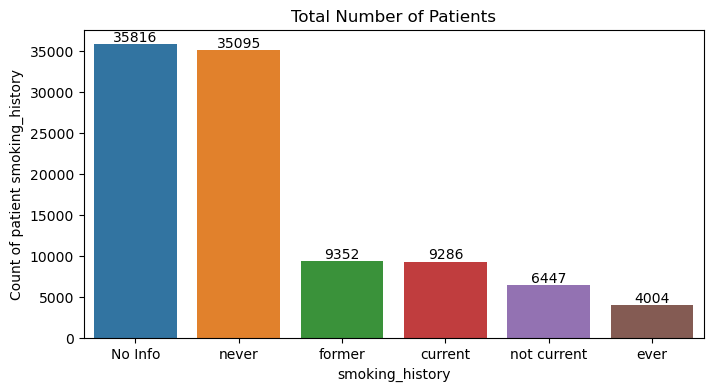

In [17]:
# number of patients with Smoking History  
plt.figure(figsize=(8,4))
ax= sns.countplot(x=df['smoking_history'],order= df['smoking_history'].value_counts(ascending=False).index)
values=df['smoking_history'].value_counts(ascending=False).values
plt.xlabel('smoking_history')
plt.ylabel("Count of patient smoking_history")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

####  We lack information on the smoking history for a considerable portion of patients, and a significant number either do not smoke or have quit.

In [18]:
# for grouping the age into various age groups 
def age_group(x):
    if x <= 25:
        return "Youth Adult(25-39)"
    elif x <= 40:
        return " Adult(40-49)"
    elif x <= 50:
        return " Older Adult(50-64)"
    else:
        return "Elder(65 and above)"

In [19]:
# adding the age group  to the table 
df ["age_group"] = df ["age"].apply(age_group)
        
df.head(2)# viewing the table 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertensionlabel2,heartdislabel3,diabeteslabel4,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,No,Yes,No,Elder(65 and above)
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No,No,No,Elder(65 and above)


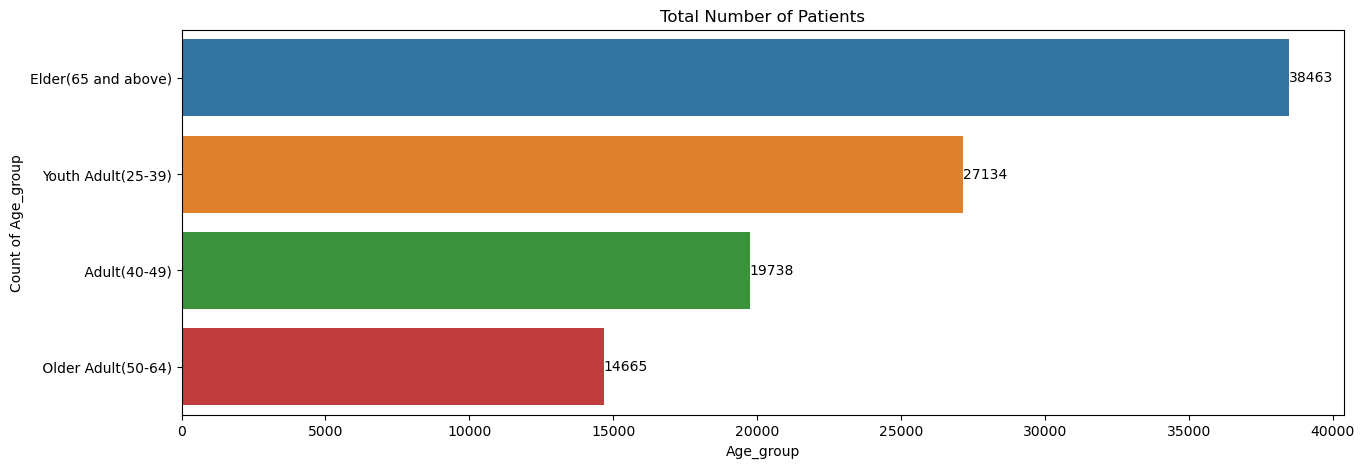

In [20]:
# visualizing the age group 
plt.figure(figsize=(15,5))
ax= sns.countplot(y=df["age_group"], data=df,order= df["age_group"].value_counts(ascending=False).index)
values=df["age_group"].value_counts(ascending=False).values
plt.xlabel("Age_group")
plt.ylabel("Count of Age_group")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

In [21]:
def bmi_group(x):
    if x <= 18.5:
        return "Underweight"
    elif x <= 24.9:
        return "Healthy weight"
    elif x <= 29.9:
        return "Overweight"
    else:
        return "Obesity "

In [22]:
df ["bmi_group"] = df ["bmi"].apply(bmi_group)
        
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertensionlabel2,heartdislabel3,diabeteslabel4,age_group,bmi_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,No,Yes,No,Elder(65 and above),Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No,No,No,Elder(65 and above),Overweight


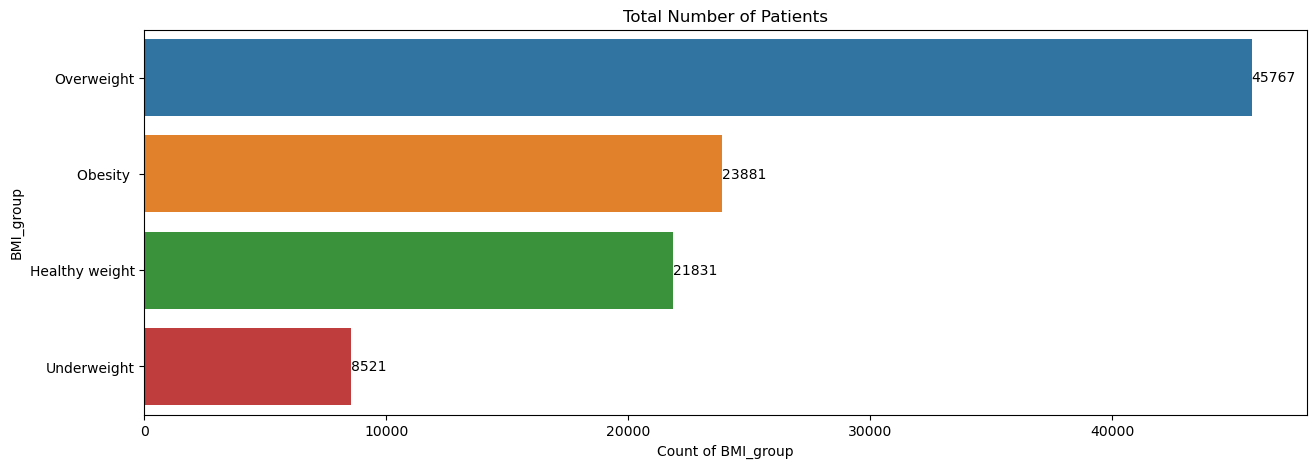

In [23]:
# visualizing the bmi group 
plt.figure(figsize=(15,5))
bx= sns.countplot(y=df["bmi_group"],order= df["bmi_group"].value_counts(ascending=False).index)
values=df["bmi_group"].value_counts(ascending=False).values
plt.xlabel("Count of BMI_group")
plt.ylabel("BMI_group")
plt.title("Total Number of Patients")
bx.bar_label(container=bx.containers[0],labels=values);

In [24]:
def HbA1c_group(x):
    if x <= 6.0:
        return "Normal"
    elif x <= 6.4:
        return "Prediabetes"
    else:
        return ">= 6.5 Diabetes "

In [25]:
df [" HbA1c_group"] = df ["HbA1c_level"].apply( HbA1c_group)
        
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertensionlabel2,heartdislabel3,diabeteslabel4,age_group,bmi_group,HbA1c_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,No,Yes,No,Elder(65 and above),Overweight,>= 6.5 Diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No,No,No,Elder(65 and above),Overweight,>= 6.5 Diabetes


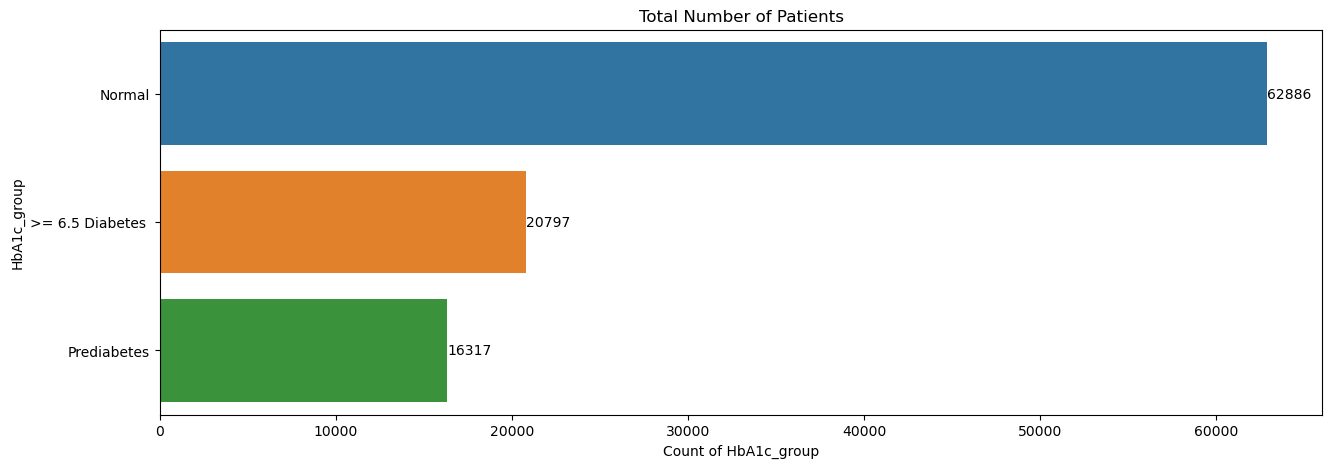

In [26]:
#custoner gender
plt.figure(figsize=(15,5))
Hx= sns.countplot(y=df[" HbA1c_group"],order= df[" HbA1c_group"].value_counts(ascending=False).index)
values=df[" HbA1c_group"].value_counts(ascending=False).values
plt.xlabel("Count of HbA1c_group")
plt.ylabel("HbA1c_group")
plt.title("Total Number of Patients")
Hx.bar_label(container=Hx.containers[0],labels=values);

#### In this demographic, individuals aged 65 and above, classified as elderly, are the most prevalent, followed by young adults. Additionally, there is a higher prevalence of overweight and obese individuals, with the majority also having normal HbA1C levels.

### Bivariate Analysis 

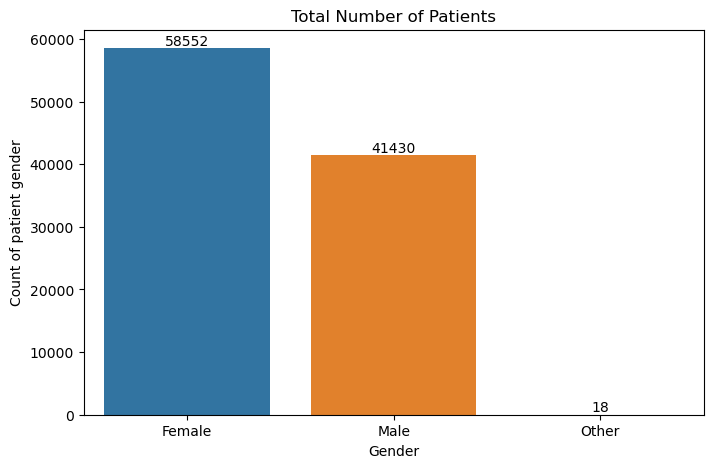

In [27]:
# number of female: male in the gender column
plt.figure(figsize=(8,5))
ax= sns.countplot(x=df["gender"],order= df["gender"].value_counts(ascending=False).index)
values=df["gender"].value_counts(ascending=False).values
plt.xlabel("Gender")
plt.ylabel("Count of patient gender")
plt.title("Total Number of Patients")
ax.bar_label(container=ax.containers[0],labels=values);

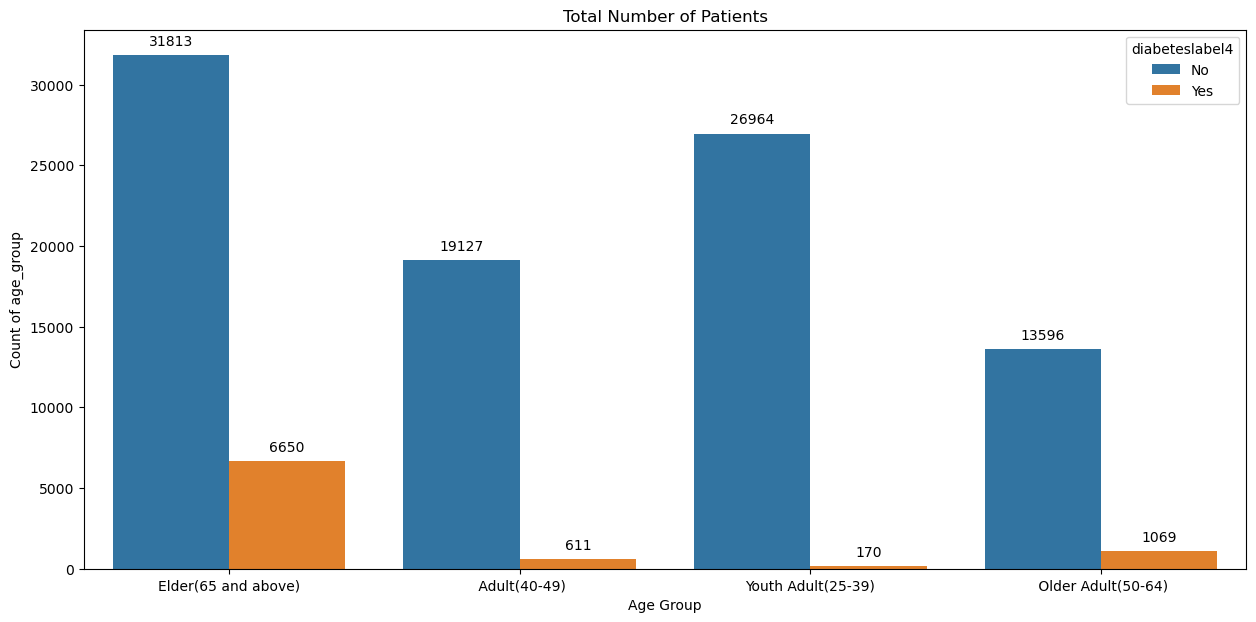

In [28]:
plt.figure(figsize = (15,7))
ag=sns.countplot(x='age_group', data=df, hue= 'diabeteslabel4' )
plt.xlabel('Age Group')
plt.ylabel('Count of age_group')
plt.title('Total Number of Patients')
for container in ag.containers:
    ag.bar_label(container, labels=[f'{int(height.get_height())}' for height in container], padding=5)
plt.show()

#label4 is the relabbelled diabetes with yes and no rather than 0 and 1

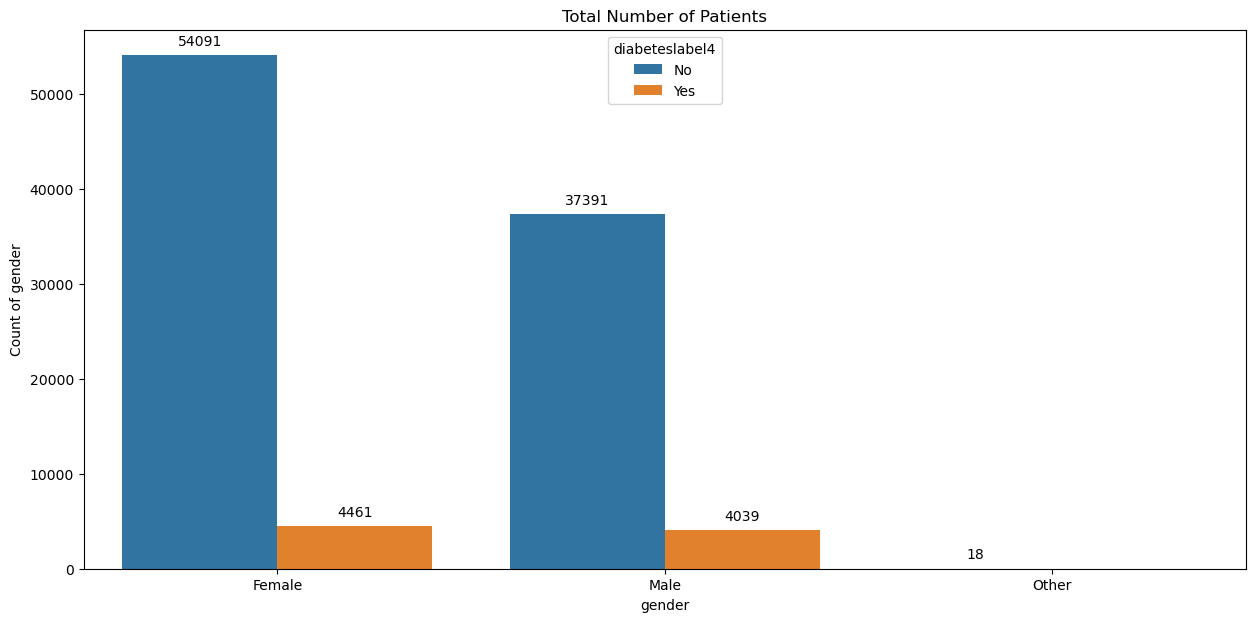

In [29]:
plt.figure(figsize = (15,7))
gx=sns.countplot(x='gender', data=df, hue= 'diabeteslabel4' )
plt.xlabel('gender')
plt.ylabel('Count of gender')
plt.title('Total Number of Patients')
# this code ensures conversion to int only happens for valid numbers.
# If NaN is found, it replaces the label with an empty string '' to avoid errors.to show the number label

for container in gx.containers:
    gx.bar_label(container, 
                 labels=[f'{int(height.get_height())}' if not np.isnan(height.get_height()) else '' for height in container], 
                 padding=5)

plt.show()

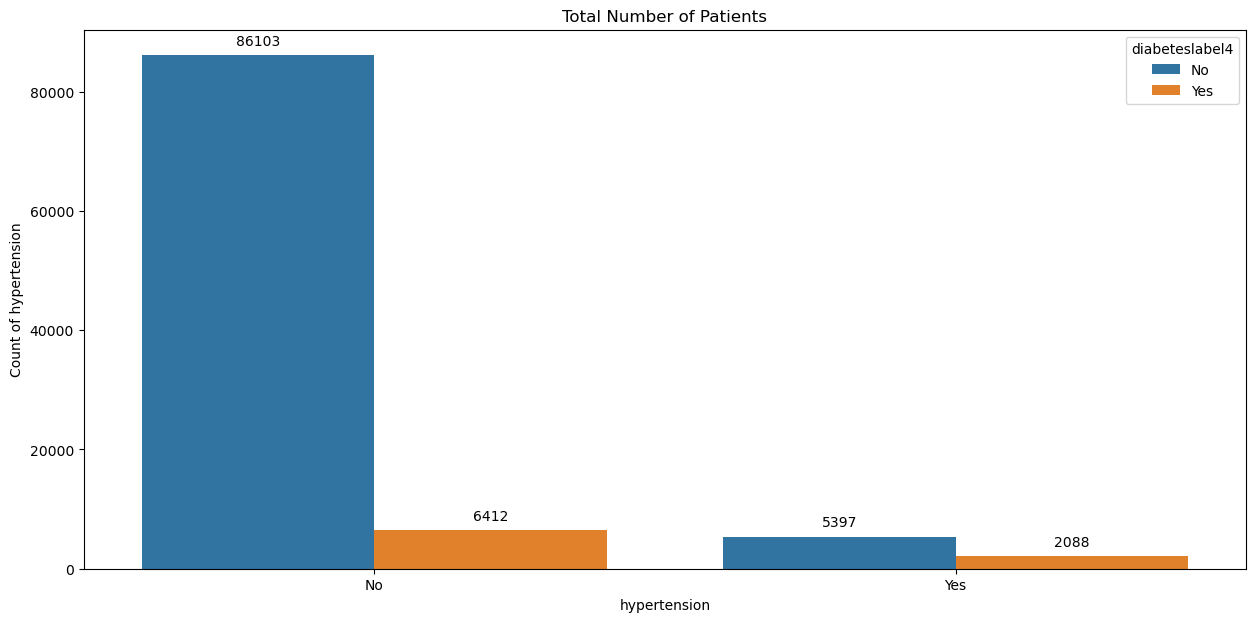

In [30]:
plt.figure(figsize = (15,7))
hy=sns.countplot(x='hypertensionlabel2', data=df, hue= 'diabeteslabel4' )
plt.xlabel('hypertension')
plt.ylabel('Count of hypertension')
plt.title('Total Number of Patients')
for container in hy.containers:
    hy.bar_label(container, labels=[f'{int(height.get_height())}' for height in container], padding=5)
plt.show()

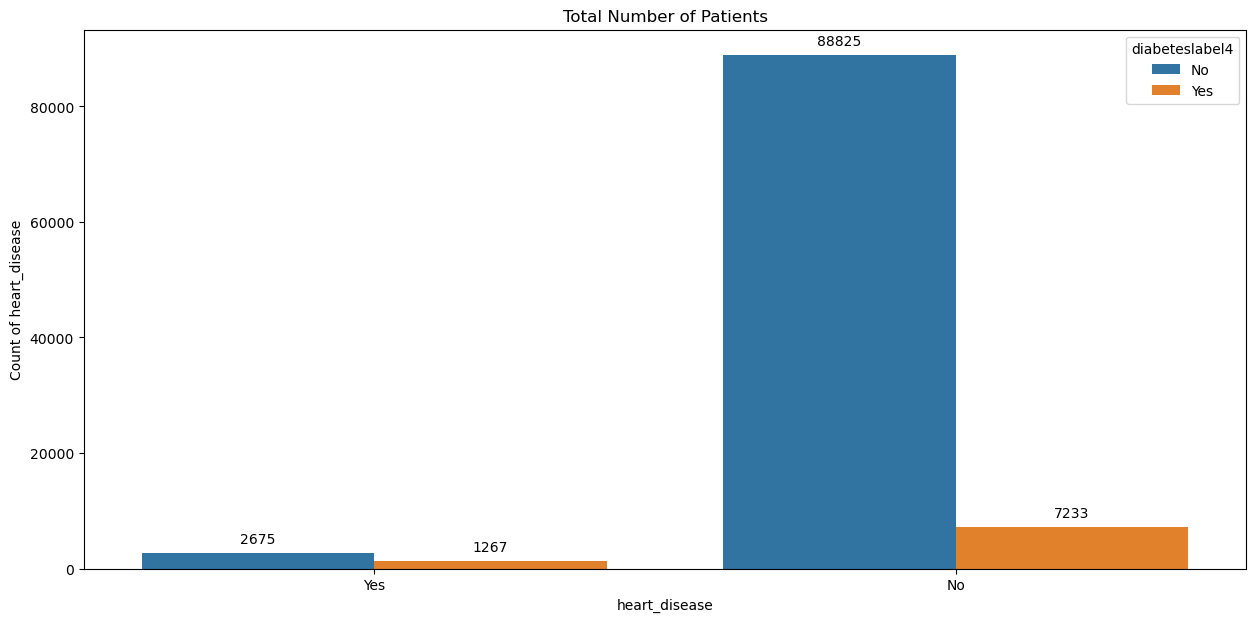

In [31]:
plt.figure(figsize = (15,7))
hd=sns.countplot(x='heartdislabel3', data=df, hue= 'diabeteslabel4' )
plt.xlabel('heart_disease')
plt.ylabel('Count of heart_disease')
plt.title('Total Number of Patients')
for container in hd.containers:
    hd.bar_label(container, labels=[f'{int(height.get_height())}' for height in container], padding=5)
plt.show()

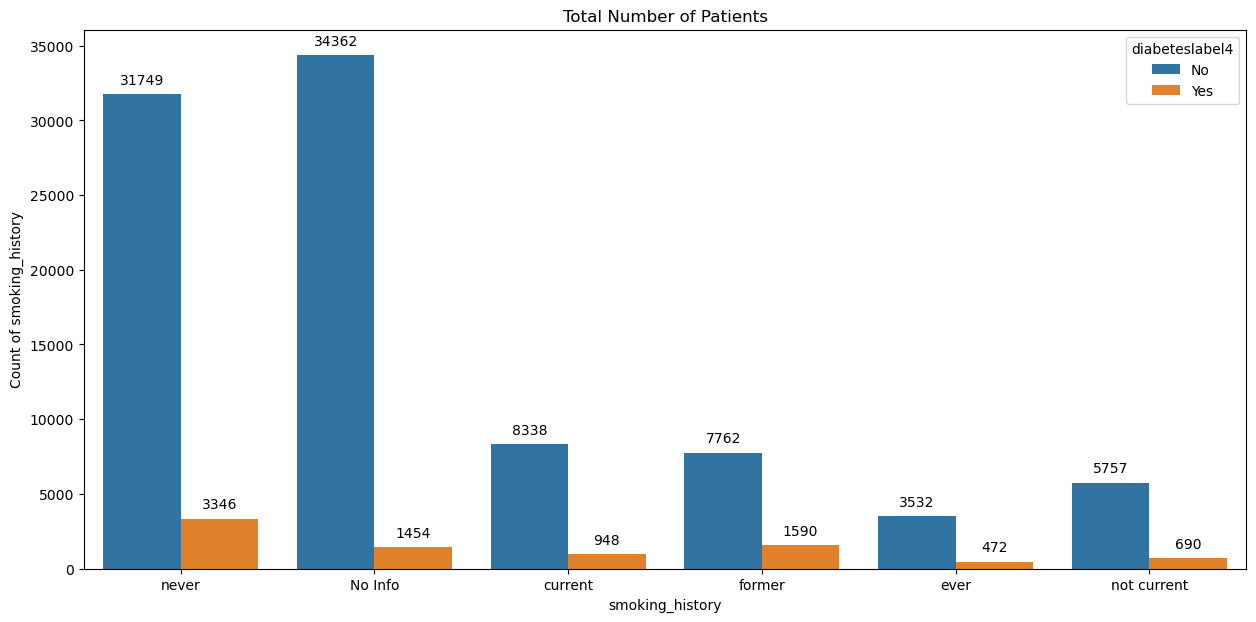

In [32]:
plt.figure(figsize = (15,7))
sh=sns.countplot(x='smoking_history', data=df, hue= 'diabeteslabel4' )
plt.xlabel('smoking_history')
plt.ylabel('Count of smoking_history')
plt.title('Total Number of Patients')
for container in sh.containers:
    sh.bar_label(container, labels=[f'{int(height.get_height())}' for height in container], padding=5)
plt.show()

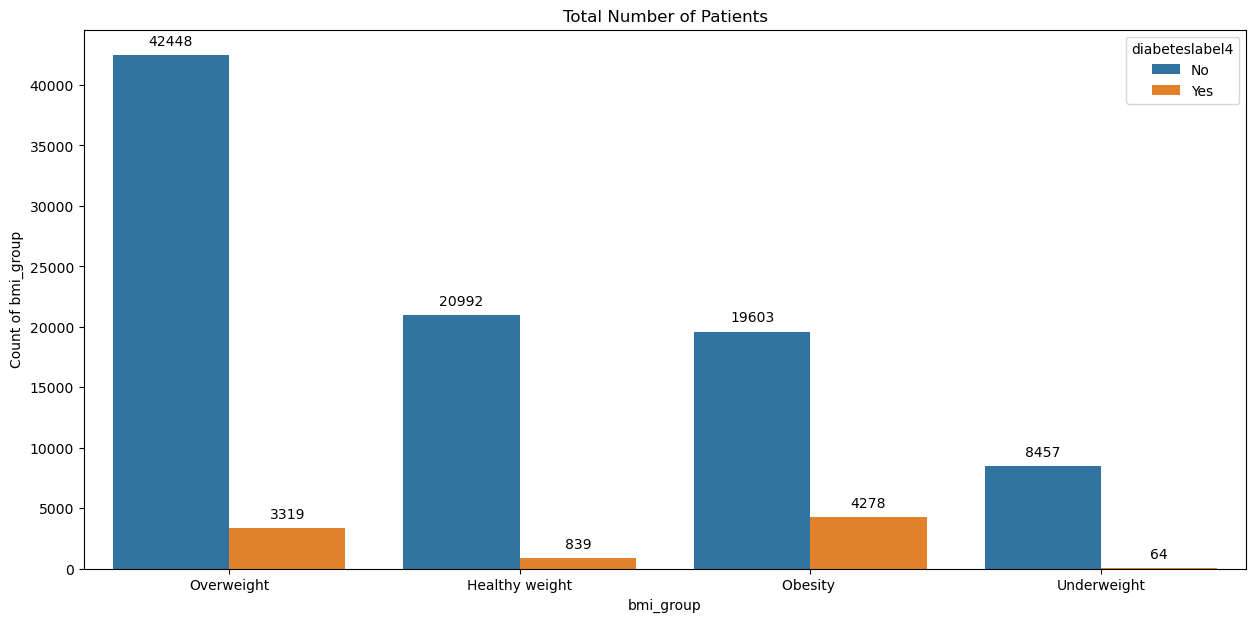

In [33]:
plt.figure(figsize = (15,7))
bg=sns.countplot(x='bmi_group', data=df, hue= 'diabeteslabel4' )
plt.xlabel('bmi_group')
plt.ylabel('Count of bmi_group')
plt.title('Total Number of Patients')
for container in bg.containers:
    bg.bar_label(container, labels=[f'{int(height.get_height())}' for height in container], padding=5)
plt.show()

## Multivariate Analysis

In [34]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'hypertensionlabel2', 'heartdislabel3', 'diabeteslabel4', 'age_group',
       'bmi_group', ' HbA1c_group'],
      dtype='object')

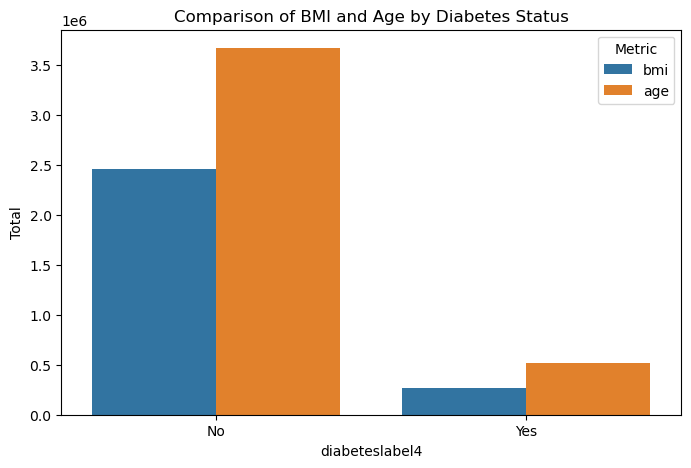

In [35]:
# Grouping and aggregating numeric columns correctly
procat1 = df.groupby('diabeteslabel4')[['bmi', 'age']].sum().reset_index()

# Counting gender occurrences separately (assuming gender is categorical)
gender_counts = df.groupby('diabeteslabel4')['gender'].value_counts().unstack().reset_index()

# Reshaping procat1 using melt
procat1 = pd.melt(procat1, id_vars='diabeteslabel4', var_name='Metric', value_name="Total")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=procat1, x='diabeteslabel4', y="Total", hue='Metric')
plt.title("Comparison of BMI and Age by Diabetes Status")
plt.show()

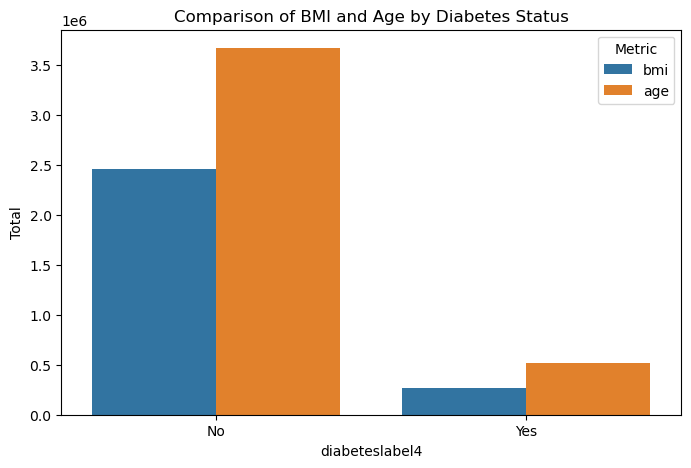

In [36]:
# Grouping and aggregating numeric columns correctly
procat1 = df.groupby('diabeteslabel4')[['bmi', 'age']].sum().reset_index()

# Counting gender occurrences separately (assuming gender is categorical)
gender_counts = df.groupby('diabeteslabel4')['gender'].value_counts().unstack().reset_index()

# Reshaping procat1 using melt
procat1 = pd.melt(procat1, id_vars='diabeteslabel4', var_name='Metric', value_name="Total")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=procat1, x='diabeteslabel4', y="Total", hue='Metric')
plt.title("Comparison of BMI and Age by Diabetes Status")
plt.show()

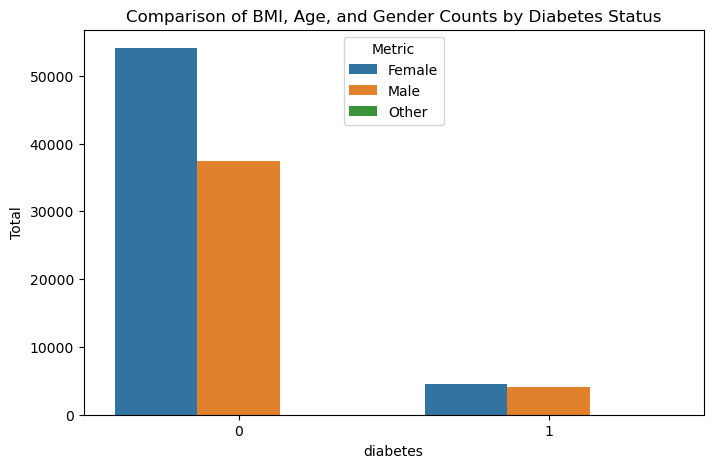

In [37]:
# Counting genders separately
gender_counts = df.groupby('diabetes')['gender'].value_counts().unstack().reset_index()

# Melting gender counts
gender_melted = pd.melt(gender_counts, id_vars='diabetes', var_name='Metric', value_name='Total')

# Combining both datasets
procat1 = pd.concat([procat1, gender_melted], ignore_index=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_melted, x='diabetes', y="Total", hue='Metric')
plt.title("Comparison of BMI, Age, and Gender Counts by Diabetes Status")
plt.show()


In [38]:
gender_melted

,diabetes,Metric,Total
0,0,Female,54091.0
1,1,Female,4461.0
2,0,Male,37391.0
3,1,Male,4039.0
4,0,Other,18.0
5,1,Other,NaN


<AxesSubplot:xlabel='diabeteslabel4', ylabel='Total'>

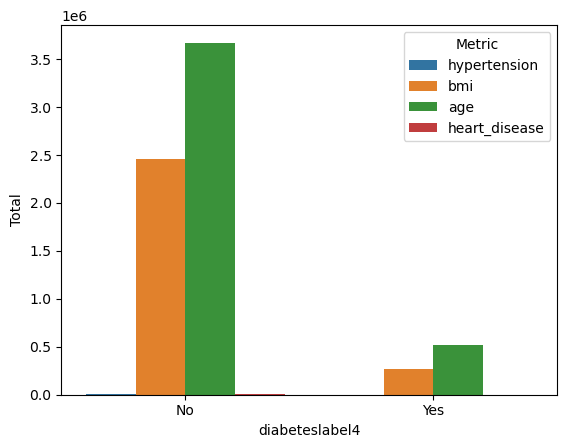

In [39]:
#analyzing 3 or more columns
procat1= df.groupby( 'diabeteslabel4')[[ 'hypertension', 'bmi', 'age','heart_disease']].sum().reset_index()
procat1 = pd.melt(procat1, id_vars= 'diabeteslabel4',var_name ='Metric',value_name="Total")
sns.barplot(data=procat1,x='diabeteslabel4',y="Total",hue='Metric')

In [40]:
procat1

,diabeteslabel4,Metric,Total
0,No,hypertension,5397.00
1,Yes,hypertension,2088.00
2,No,bmi,2460175.46
3,Yes,bmi,271901.25
4,No,age,3670539.60
5,Yes,age,518046.00
6,No,heart_disease,2675.00
7,Yes,heart_disease,1267.00


### Corelation 

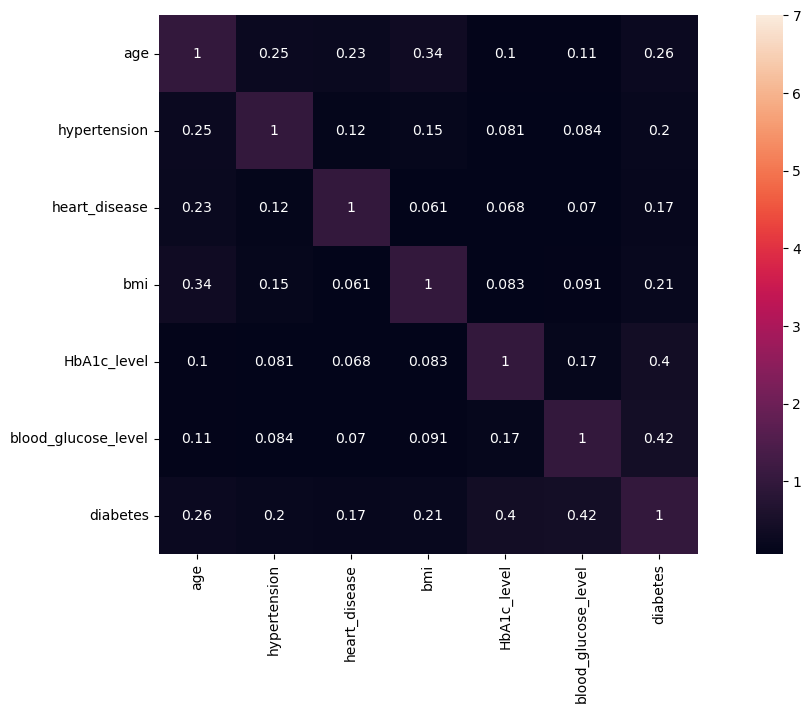

In [41]:
d = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(d, vmax=7,square=True,annot=True);

The heatmap shows how various health factors are correlated with diabetes:

Strongest correlations:

Blood Glucose (0.42) and HbA1c (0.40) are the most significant predictors of diabetes risk.

Moderate correlations:

Age (0.26), Hypertension (0.20), BMI (0.21), and Heart Disease (0.17) are all linked to increased diabetes risk, but with weaker correlations.

Interrelationships:

Age & BMI (0.34): Older individuals tend to have higher BMI.

Hypertension & Heart Disease (0.12): Mild correlation, as they often occur together.
Blood Glucose & HbA1c (0.17): Both measure blood sugar at different times.


Blood glucose and HbA1c are the key risk factors, while age, BMI, hypertension, and heart disease also contribute, though less strongly. Managing one factor (e.g., BMI) may reduce the risk of others (e.g., hypertension, diabetes).









## Feature Engineering

In [42]:
df1 = df[['gender','age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]

label1= df[['diabetes']]

In [43]:
df1 = df1.copy()  # Create an explicit copy to avoid SettingWithCopyWarning

df1.loc[:, 'gender'] = df1['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [44]:
df2 = df1.copy()  # Create an explicit copy to avoid SettingWithCopyWarning

df2.loc[:, 'smoking_history'] = df2['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2,'former': 3,'not current': 4,'ever': 5})

In [45]:
df2.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,0,25.19,6.6,140
1,1,54.0,0,0,1,27.32,6.6,80


## Machine Learning 

In [46]:
#normalization it has taken care of the outlier 
scaler = MinMaxScaler()

df2["scalar_"]  = scaler.fit_transform(df2['bmi'].values.reshape(-1,1))
df2["scalar_bmi"]  = scaler.fit_transform(df2['bmi'].values.reshape(-1,1))
df2["scalar_bgl"]  = scaler.fit_transform(df2['blood_glucose_level'].values.reshape(-1,1))
df2["scalar_hba1c"] = scaler.fit_transform(df2['HbA1c_level'].values.reshape(-1,1))
df2["scalar_SH"] = scaler.fit_transform(df2['smoking_history'].values.reshape(-1,1)) 
df2.drop(['bmi','blood_glucose_level','HbA1c_level','smoking_history'],axis =1, inplace= True)

In [47]:
df2.head(2)

,gender,age,hypertension,heart_disease,scalar_,scalar_bmi,scalar_bgl,scalar_hba1c,scalar_SH
0,1,80.0,0,1,0.177171,0.177171,0.272727,0.563636,0.0
1,1,54.0,0,0,0.202031,0.202031,0.000000,0.563636,0.2


In [48]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df2, label1, test_size=0.2, random_state=42)


In [49]:
df2.shape

(100000, 9)

In [50]:
# Train Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
ly_pred =logreg.predict(X_test)

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Print Model Details
print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, ly_pred))

print("Precision:", precision_score(y_test, ly_pred))
print("Recall: ", recall_score(y_test, ly_pred))
print("F1 Score:", f1_score(y_test, ly_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, ly_pred))

LogisticRegression
Accuracy: 0.95875
Precision: 0.8688387635756056
Recall:  0.6088992974238876
F1 Score: 0.7160068846815835
ROC-AUC Score: 0.8001581551628513


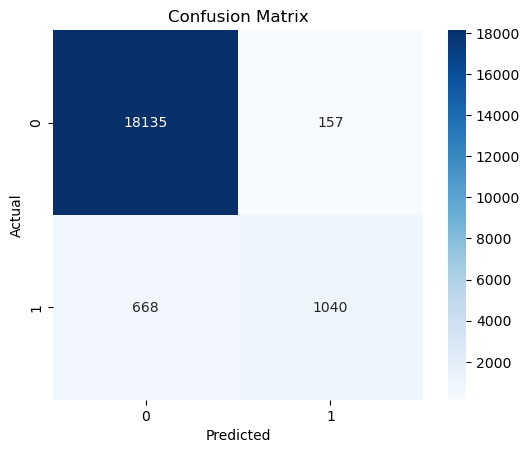

In [52]:
#create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#d = df.corr()
sns.heatmap(lcm, cmap="Blues",square=True,fmt='g', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##### Confusion Matrix Analysis The confusion matrix provides insights into the model's classification performance for diabetes prediction. 
The four values represent: True Negatives (TN) = 18,146 → The model correctly predicted non-diabetic cases.False Positives (FP) = 146 → The model incorrectly predicted diabetic when the patient was actually non-diabetic (Type I Error).False Negatives (FN) = 687 → The model incorrectly predicted non-diabetic when the patient was actually diabetic (Type II Error).True Positives (TP) = 1,021 → The model correctly predicted diabetic cases.Findings and Interpretation High True Negative Rate The model performs exceptionally well in detecting non-diabetic cases, with 18,146 correct predictions. Low False Positive Rate (146 cases) Very few non-diabetic individuals were misclassified as diabetic. This is a good outcome because it reduces unnecessary anxiety and medical tests for healthy individuals. Moderate False Negative Rate (687 cases) The model misses some diabetic cases, which is concerning because failing to diagnose diabetes can have severe health consequences. Good True Positive Count (1,021 cases) The model identifies a reasonable number of actual diabetic cases correctly, but there is room for improvement. Conclusion and Next Steps The model performs well overall, with a high accuracy in predicting non-diabetic cases.However, the 687 false negatives indicate that some diabetic cases are being missed. Possible improvements: Adjusting the classification threshold to increase sensitivity. Using a different evaluation metric, such as F1-score or Recall, to balance false negatives.Exploring feature importance to see if additional factors can improve diabetic detection.

In [53]:
# Train Random Forest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
r_pred = model.predict(X_test)
print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, r_pred))

print("Precision:", precision_score(y_test, r_pred))
print("Recall: ", recall_score(y_test, r_pred))
print("F1 Score:", f1_score(y_test, r_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, r_pred))

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LogisticRegression
Accuracy: 0.9704
Precision: 0.9435612082670907
Recall:  0.6949648711943794
F1 Score: 0.8004045853000674
ROC-AUC Score: 0.8455416964762625


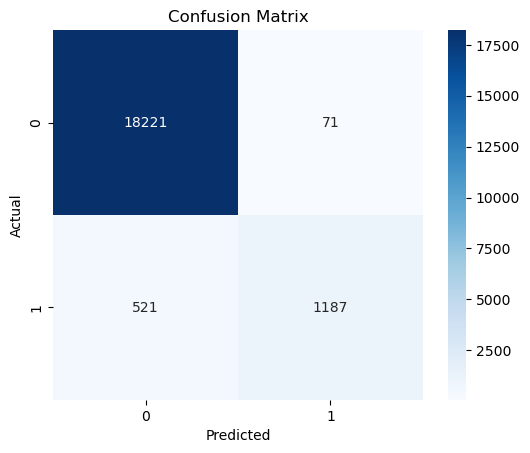

In [54]:
#create a confusion matrix
lcm = confusion_matrix(y_test, r_pred)

#d = df.corr()
sns.heatmap(lcm, cmap="Blues",square=True,fmt='g', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
# 8 machine learning algorithm
classifiers = [[ XGBClassifier(), "XGBclassifier"],
               [ RandomForestClassifier(), "Random Forest"],
               [KNeighborsClassifier(), "K-Nearest Neighbors"],
               [SGDClassifier(), "SGD Classifier " ],
               [ SVC(), "Support Vector Machine"],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(), "Decision Tree"],
               [ LogisticRegression(), "Logistic Regression"]]

In [ ]:
acc_list ={}
precision_list ={}
recall_list ={}
roc_list ={}

for classifier in classifiers:
    
    model = classifier[0]
    model.fit(X_train,y_train )
    model_name = classifier[1]
    pred = model.predict(X_test) 
    
    a_score= accuracy_score(y_test, pred)
    p_score= precision_score(y_test, pred)
    r_score= recall_score(y_test, pred)
    roc_score= roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name is classifiers[-1][1]:
       print('')
    
    

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [ ]:
#create a confusion matrix
lcm = confusion_matrix(y_test, pred)

#d = df.corr()
sns.heatmap(lcm, cmap="Blues",square=True,fmt='g', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
acc_list

In [ ]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()


In [ ]:
print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

In [ ]:
print("auc Roc Score")
s4 = pd.DataFrame(roc_list)
s4.head()

In [ ]:
for classifier in classifiers:
    print(type(classifier[0]), classifier[1])

##### Key Observations
High True Negatives (18,146 cases)

The model correctly predicted non-diabetic individuals with high accuracy.
Low False Positives (146 cases)

Only 146 non-diabetic individuals were incorrectly classified as diabetic.
This means the model has a high specificity (ability to correctly identify non-diabetic cases).
False Negatives (687 cases)

These are actual diabetic cases that the model failed to identify.
This is concerning because missing a diabetic diagnosis can have serious health implications.
True Positives (1,021 cases)

The model correctly identified diabetic cases, but it could be improved to reduce false negatives.


Conclusion & Model Performance
Strengths:
The model demonstrates high accuracy and strong specificity, meaning it effectively identifies non-diabetic individuals with minimal false positives.
Weaknesses:
A relatively high number of false negatives indicates that some diabetic cases are being missed, which is a critical concern in medical applications.
Areas for Improvement:
Enhancing Recall (Sensitivity): The model should be optimized to correctly identify more diabetic cases.
Potential Solutions:
Adjusting the decision threshold to favor recall over precision.
Implementing cost-sensitive learning to penalize misclassification of diabetic cases.
Using ensemble methods to improve overall predictive performance.
Final Thoughts:
While the model performs well overall, the presence of false negatives poses a risk in a healthcare setting where missing a diabetes diagnosis can have severe consequences. Further refinements, such as addressing class imbalance and tuning hyperparameters, can improve its effectiveness in detecting diabetic patients.